<h1>Correlation of Cryptos' prices from top 11 by Market Cap<br><u>over 90 days</u></h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from coinMarketCap import getTopHistory

dfs = getTopHistory(limit=11, days=90)

#print market cap top
pd.DataFrame([dfs[key].iloc[-1]['marketCap'] for key in dfs],
             index=list(dfs.keys()), 
             columns=['Market Cap for ' + str(dfs[next(iter(dfs))].iloc[-1].name.date())])

,Market Cap for 2021-11-12
BTC,1.210715e+12
ETH,5.521994e+11
BNB,1.045247e+11
USDT,7.386830e+10
SOL,6.922472e+10
ADA,6.812162e+10
XRP,5.608875e+10
DOT,4.531094e+10
DOGE,3.426508e+10
USDC,3.440012e+10


In [3]:
closePrice_df = pd.concat([dfs[key]['close'] for key in dfs],axis=1, keys=list(dfs.keys()))
closePrice_df

,BTC,ETH,BNB,USDT,SOL,ADA,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2021-08-16,46004.484079,3156.509427,417.470857,1.000438,62.432463,2.079417,1.190993,24.535857,0.320715,1.000102,0.000009
2021-08-17,44695.357619,3014.846039,401.908895,1.000219,64.210705,1.926601,1.098199,23.533639,0.299442,1.000329,0.000008
2021-08-18,44801.188717,3020.089920,398.251454,1.000474,72.543313,2.108560,1.146097,23.948136,0.303739,1.000237,0.000008
2021-08-19,46717.578745,3182.702225,430.988854,0.999685,72.757606,2.428140,1.232842,26.548627,0.317144,0.999649,0.000008
2021-08-20,49339.176037,3286.935326,454.936319,1.000668,78.724619,2.457702,1.263222,28.146954,0.327491,1.000311,0.000008
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,67566.830088,4812.087614,654.315002,1.000443,248.467178,2.124419,1.282377,53.348459,0.282359,0.999828,0.000055
2021-11-09,66971.828097,4735.068755,635.190595,1.000202,239.213138,2.273483,1.258930,50.779363,0.273526,1.000075,0.000055
2021-11-10,64995.229391,4636.174214,615.278062,1.000097,233.779519,2.101802,1.193373,46.871331,0.255709,0.999523,0.000050


<h2>Calculate Pearson and Spearman Correlation by Price for 90 Days</h2>

Text(0.5, 0.98, 'Correlation over 90 days')

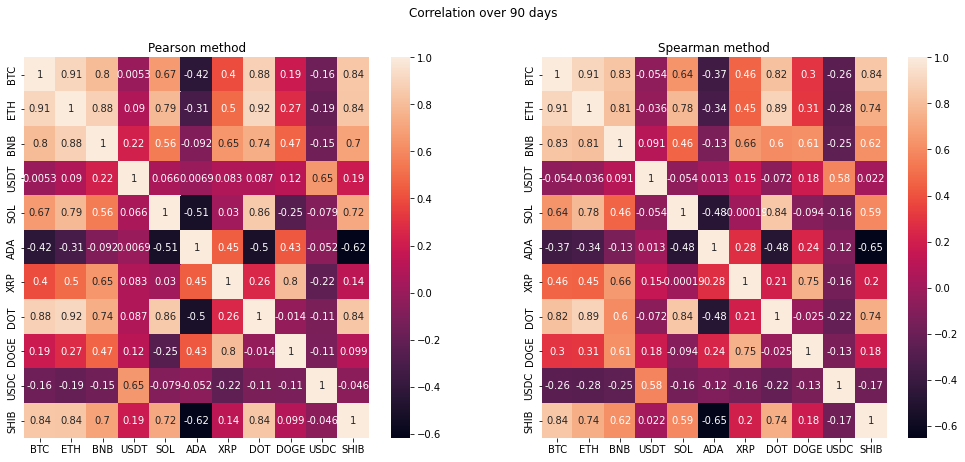

In [6]:
pearson_corr = closePrice_df.corr(method='pearson')
spearman_corr = closePrice_df.corr(method='spearman')

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson method")
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman method")
fig.suptitle("Correlation over 90 days")

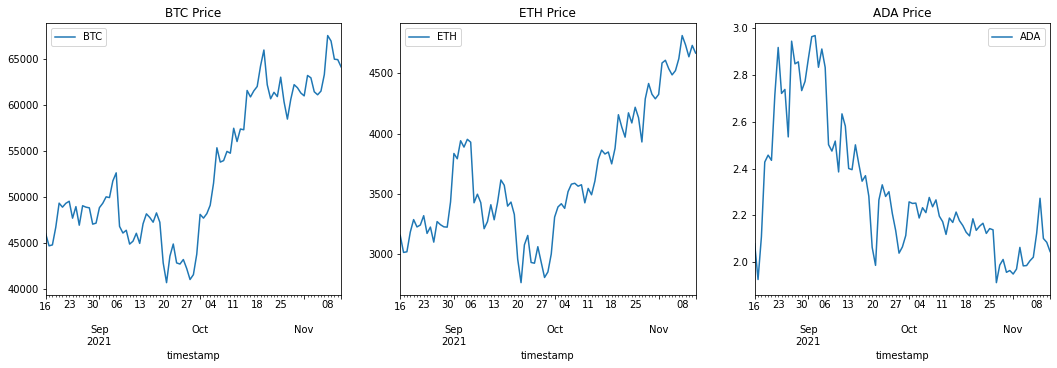

In [5]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ETH', 'ADA']):
    closePrice_df.plot(ax=axes[i], y=crypto).set(title=crypto+" Price")